<a href="https://colab.research.google.com/github/Developer-Bhavya/HOTEL_REVIEW_ANALYSIS/blob/main/Hotel_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn nltk transformers sentence-transformers
!pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install keybert sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from transformers import pipeline
from keybert import KeyBERT
from nltk.corpus import stopwords
from collections import Counter


In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()  # Upload your `kaggle.json` file here


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"bhavyataneja09","key":"917551048a82457954f35b7ee9391c3a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d jiashenliu/515k-hotel-reviews-data-in-europe


Dataset URL: https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe
License(s): CC0-1.0
  0% 0.00/45.1M [00:00<?, ?B/s]
100% 45.1M/45.1M [00:00<00:00, 638MB/s]


In [ ]:
!unzip -q 515k-hotel-reviews-data-in-europe.zip


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("Hotel_Reviews.csv")

# Show first few rows
df.head()


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [ ]:
# If you want to keep only the review comments (e.g., Negative + Positive)
df['review'] = df['Negative_Review'] + " " + df['Positive_Review']

# Drop empty reviews
df = df[df['review'].str.strip().astype(bool)]
df = df[['review']]  # Keep only the review column
df.head()


,review
0,I am so angry that i made this post available...
1,No Negative No real complaints the hotel was ...
2,Rooms are nice but for elderly a bit difficul...
3,My room was dirty and I was afraid to walk ba...
4,You When I booked with your company on line y...


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)         # Remove punctuation & numbers
    text = text.lower()                             # Convert to lowercase
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

df['clean_review'] = df['review'].astype(str).apply(clean_text)
df[['review', 'clean_review']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,clean_review
0,I am so angry that i made this post available...,angry made post available via possible sites u...
1,No Negative No real complaints the hotel was ...,negative real complaints hotel great great loc...
2,Rooms are nice but for elderly a bit difficul...,rooms nice elderly bit difficult rooms two sto...
3,My room was dirty and I was afraid to walk ba...,room dirty afraid walk barefoot floor looked c...
4,You When I booked with your company on line y...,booked company line showed pictures room thoug...


In [ ]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

# Limit to first 1000 for speed — expand later
df_sample = df.head(1000).copy()

# Analyze sentiment
df_sample['sentiment'] = df_sample['clean_review'].apply(lambda x: sentiment_pipeline(x[:512])[0]['label'])

df_sample[['clean_review', 'sentiment']].head()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


,clean_review,sentiment
0,angry made post available via possible sites u...,NEGATIVE
1,negative real complaints hotel great great loc...,NEGATIVE
2,rooms nice elderly bit difficult rooms two sto...,POSITIVE
3,room dirty afraid walk barefoot floor looked c...,NEGATIVE
4,booked company line showed pictures room thoug...,NEGATIVE


In [ ]:
from keybert import KeyBERT
kw_model = KeyBERT()

def extract_keywords(text):
    keywords = kw_model.extract_keywords(text, top_n=5, stop_words='english')
    return [kw[0] for kw in keywords]

df_sample['topics'] = df_sample['clean_review'].apply(extract_keywords)
df_sample[['clean_review', 'sentiment', 'topics']].head()


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,clean_review,sentiment,topics
0,angry made post available via possible sites u...,NEGATIVE,"[hotel, room, booking, noise, booked]"
1,negative real complaints hotel great great loc...,NEGATIVE,"[hotel, restaurant, checkout, amsterdam, compl..."
2,rooms nice elderly bit difficult rooms two sto...,POSITIVE,"[rooms, hotel, elderly, location, inside]"
3,room dirty afraid walk barefoot floor looked c...,NEGATIVE,"[furniture, room, hotel, floor, amsterdam]"
4,booked company line showed pictures room thoug...,NEGATIVE,"[rooms, room, booked, advertising, photos]"


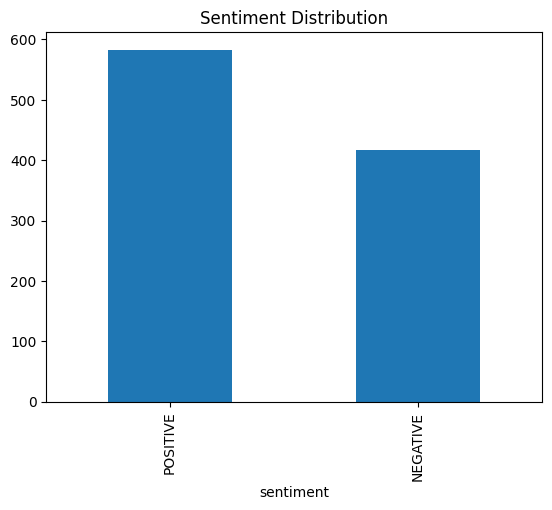

In [ ]:
import matplotlib.pyplot as plt

df_sample['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.show()


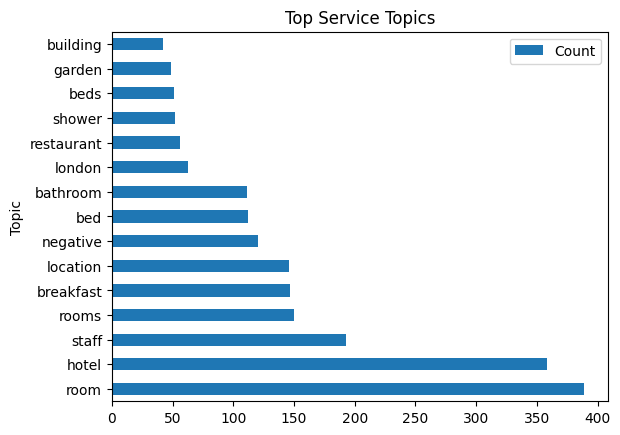

In [ ]:
from collections import Counter

all_keywords = df_sample['topics'].explode().dropna()
top_keywords = Counter(all_keywords).most_common(15)

pd.DataFrame(top_keywords, columns=['Topic', 'Count']).plot(x='Topic', y='Count', kind='barh', title='Top Service Topics')
plt.show()


In [ ]:
df_sample.to_csv('hotel_review_sentiment_output.csv', index=False)

# To download
from google.colab import files
files.download('hotel_review_sentiment_output.csv')
